In [1]:
import pandas as pd


## Histogramas

In [3]:
dados = pd.read_csv("../data/entregas_distancia_tempo.csv")
dados

,Distancia (km),Tempo (minutos)
0,29,78
1,27,32
2,105,120
3,70,144
4,120,116
...,...,...
245,15,17
246,109,102
247,33,29
248,17,29


<Axes: ylabel='Frequency'>

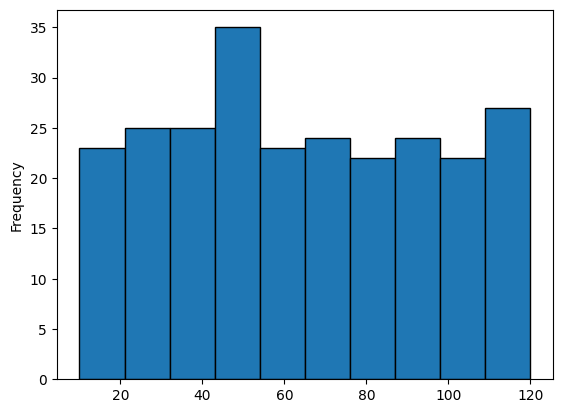

In [10]:
dados["Distancia (km)"].plot(kind="hist",edgecolor='black')

In [13]:
dados.columns=["distancia", "tempo"]

In [14]:
dados

,distancia,tempo
0,29,78
1,27,32
2,105,120
3,70,144
4,120,116
...,...,...
245,15,17
246,109,102
247,33,29
248,17,29


<Axes: ylabel='Frequency'>

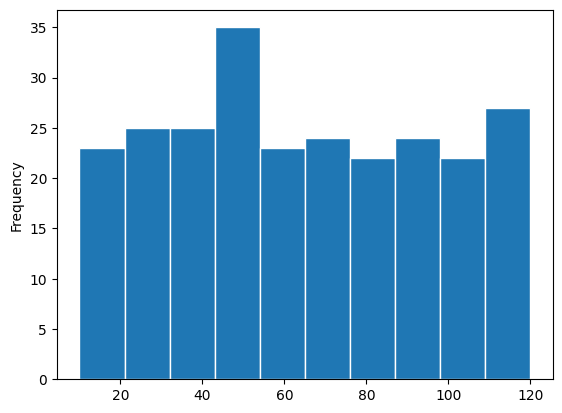

In [16]:
dados.distancia.plot(kind="hist",edgecolor="white")

<Axes: ylabel='Frequency'>

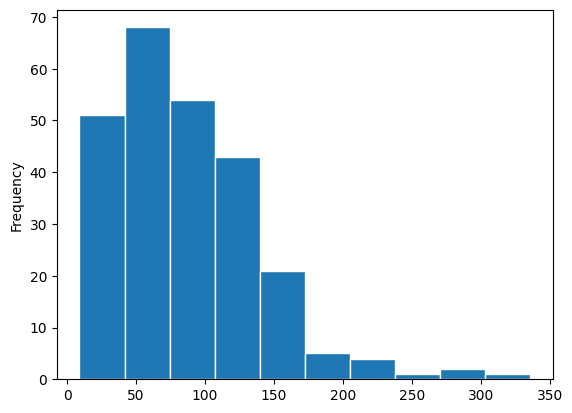

In [18]:
dados.tempo.plot(kind="hist",edgecolor="white")

In [22]:
dados["velocidade"] = (dados.distancia / dados.tempo) * 60
dados

,distancia,tempo,velocidade
0,29,78,22.307692
1,27,32,50.625000
2,105,120,52.500000
3,70,144,29.166667
4,120,116,62.068966
...,...,...,...
245,15,17,52.941176
246,109,102,64.117647
247,33,29,68.275862
248,17,29,35.172414


<Axes: ylabel='Frequency'>

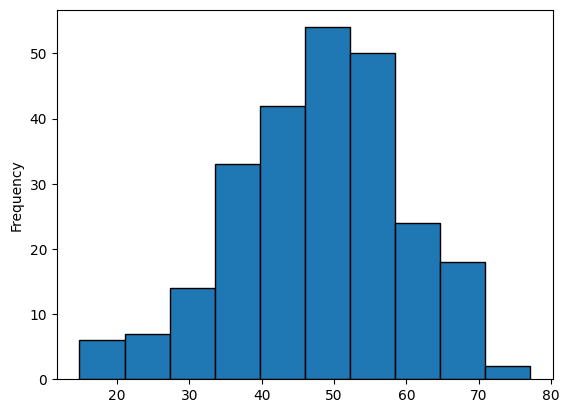

In [24]:
dados.velocidade.plot(kind="hist", edgecolor="black")

In [28]:
dados.velocidade.value_counts(normalize=True)

60.000000    0.020
51.428571    0.016
50.000000    0.012
55.384615    0.012
66.666667    0.008
             ...  
42.105263    0.004
30.545455    0.004
56.842105    0.004
35.064935    0.004
35.172414    0.004
Name: proportion, Length: 220, dtype: float64

## Regressao

In [31]:
import seaborn as sns

In [29]:
dados = pd.read_csv("../data/renda_gastos_livros.csv")
dados

,Renda Familiar,Gasto com Livros por Ano
0,"R$ 3,000.00",R$ 150.00
1,"R$ 5,000.00",R$ 200.00
2,"R$ 10,000.00",R$ 600.00
3,"R$ 10,000.00",R$ 700.00
4,"R$ 20,000.00","R$ 1,000.00"
5,"R$ 20,000.00","R$ 1,200.00"
6,"R$ 20,000.00","R$ 1,500.00"
7,"R$ 30,000.00",R$ 800.00
8,"R$ 40,000.00","R$ 1,000.00"
9,"R$ 50,000.00","R$ 2,000.00"


In [45]:
dados["renda"]=dados["Renda Familiar"].replace("[R$]","", regex=True).replace('[,]','', regex=True).astype(float)

In [49]:
dados["gastos"]=dados["Gasto com Livros por Ano"].replace("[R$]","", regex=True).replace('[,]','', regex=True).astype(float)

In [50]:
dados

,Gasto com Livros por Ano,renda,gastos
0,R$ 150.00,3000.0,150.0
1,R$ 200.00,5000.0,200.0
2,R$ 600.00,10000.0,600.0
3,R$ 700.00,10000.0,700.0
4,"R$ 1,000.00",20000.0,1000.0
5,"R$ 1,200.00",20000.0,1200.0
6,"R$ 1,500.00",20000.0,1500.0
7,R$ 800.00,30000.0,800.0
8,"R$ 1,000.00",40000.0,1000.0
9,"R$ 2,000.00",50000.0,2000.0


In [48]:
dados.drop("Renda Familiar", axis=1, inplace=True)
dados

,Gasto com Livros por Ano,renda
0,R$ 150.00,3000.0
1,R$ 200.00,5000.0
2,R$ 600.00,10000.0
3,R$ 700.00,10000.0
4,"R$ 1,000.00",20000.0
5,"R$ 1,200.00",20000.0
6,"R$ 1,500.00",20000.0
7,R$ 800.00,30000.0
8,"R$ 1,000.00",40000.0
9,"R$ 2,000.00",50000.0


In [51]:
dados.drop("Gasto com Livros por Ano", axis=1, inplace=True)
dados

,renda,gastos
0,3000.0,150.0
1,5000.0,200.0
2,10000.0,600.0
3,10000.0,700.0
4,20000.0,1000.0
5,20000.0,1200.0
6,20000.0,1500.0
7,30000.0,800.0
8,40000.0,1000.0
9,50000.0,2000.0


In [52]:
dados.corr()

,renda,gastos
renda,1.000000,0.954051
gastos,0.954051,1.000000


In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [56]:
# Instanciar o modelo de regressão linear
modelo = LinearRegression()

In [60]:
# Treinar o modelo
modelo.fit(dados[["renda"]], dados.gastos)

LinearRegression()

In [61]:
# Coeficientes do modelo
coeficiente_angular = modelo.coef_[0]
intercepto = modelo.intercept_

In [62]:
# Imprimir os coeficientes
print("Coeficiente angular:", coeficiente_angular)
print("Intercepto:", intercepto)

Coeficiente angular: 0.025576913927780325
Intercepto: 540.0469143228993


In [63]:
import matplotlib.pyplot as plt

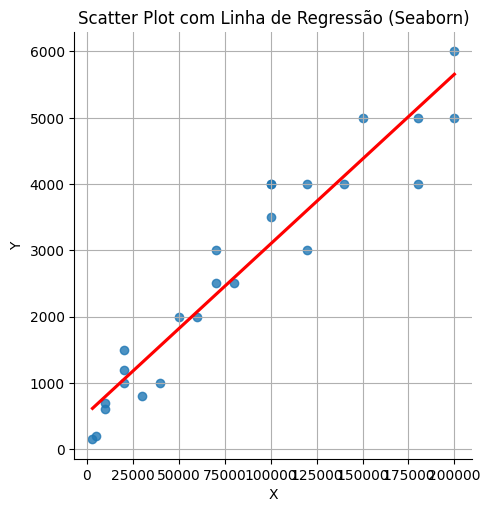

In [64]:
# Plotar o scatter plot com linha de regressão usando o Seaborn
sns.lmplot(x='renda', y='gastos', data=dados, ci=None, line_kws={'color': 'red'})
plt.title('Scatter Plot com Linha de Regressão (Seaborn)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()